<a href="https://colab.research.google.com/github/ksshu/Machine_learning/blob/main/denoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
! ls /content/gdrive/MyDrive/denoise/

data  Untitled0.ipynb


In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
import cv2
import os

In [ ]:
## Dfining paths
PATH_TO_CLEAN_IMAGES = "/content/gdrive/MyDrive/denoise/data/clean_images/"
PATH_TO_NOISY_IMAGES = "/content/gdrive/MyDrive/denoise/data/noisy_images/"

In [ ]:
CLEAN_IMAGES_PATHS = []

for i in os.listdir(PATH_TO_CLEAN_IMAGES):
  path = PATH_TO_CLEAN_IMAGES+i
  CLEAN_IMAGES_PATHS.append(path)

In [ ]:
def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

In [ ]:
CLEAN_IMAGES_PATHS

['/content/gdrive/MyDrive/denoise/data/clean_images/u1.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u2.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u3.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u4.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u5.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u6.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u7.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u8.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u9.jpeg',
 '/content/gdrive/MyDrive/denoise/data/clean_images/u10.jpeg']

In [ ]:
SIZE = 256

In [ ]:
CLEAN_IMAGES = []
NOISY_IMAGES = []

for i in CLEAN_IMAGES_PATHS:
  
  img = cv2.imread(i, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (SIZE, SIZE), interpolation = cv2.INTER_NEAREST)
  
  CLEAN_IMAGES.append(img)

  noisy_img = add_noise(img)

  NOISY_IMAGES.append(noisy_img)
  

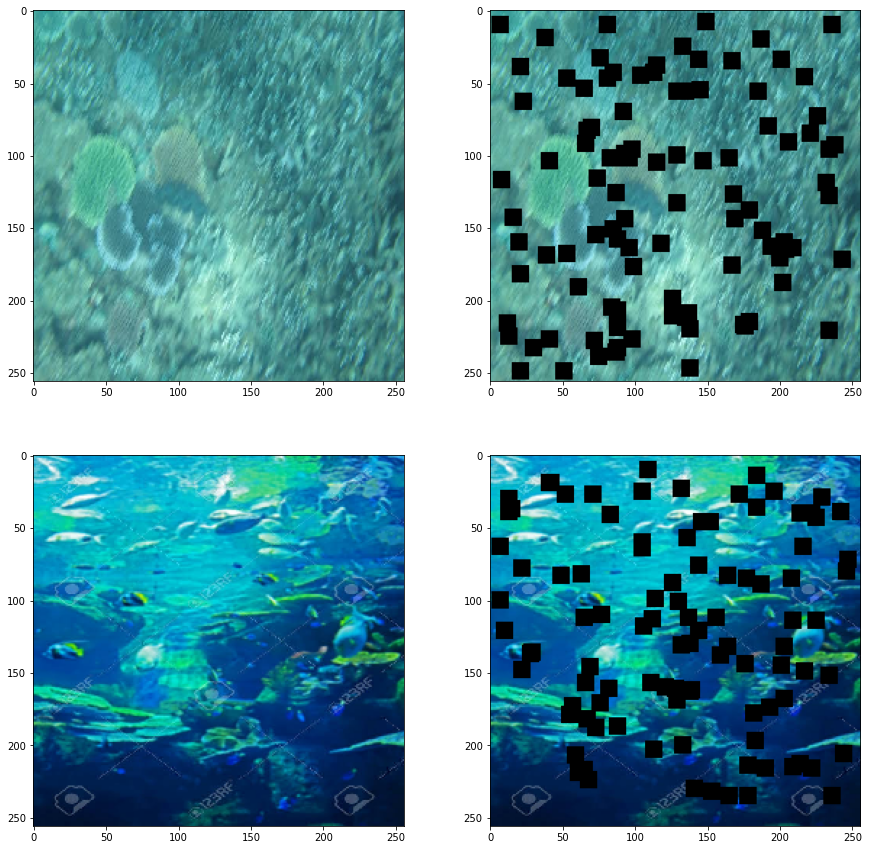

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0][0].imshow(CLEAN_IMAGES[2])
axes[0][1].imshow(NOISY_IMAGES[2])
axes[1][0].imshow(CLEAN_IMAGES[3])
axes[1][1].imshow(NOISY_IMAGES[3])

In [ ]:
## Storing noisy images
def save_images(arr_images, path_to_store):

  for i in range(0,len(arr_images)):

    img = cv2.cvtColor(arr_images[i], cv2.COLOR_RGB2BGR)

    name = f"_{i}.jpeg"
    
    cv2.imwrite(path_to_store + name, img)

In [ ]:
save_images(NOISY_IMAGES, PATH_TO_NOISY_IMAGES)

In [ ]:
CLEAN_IMAGES = np.array(CLEAN_IMAGES)
NOISY_IMAGES = np.array(NOISY_IMAGES)

In [ ]:
CLEAN_IMAGES[0].shape

(256, 256, 3)

In [ ]:
from keras import Sequential
from keras.preprocessing.image import img_to_array
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         5

In [ ]:
model.fit(NOISY_IMAGES, CLEAN_IMAGES,
        epochs=1000)

print("Neural network output")
pred = model.predict(NOISY_IMAGES)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 13326.4277 - accuracy: 0.3989
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 12699.4082 - accuracy: 0.3598
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 11859.7031 - accuracy: 0.3153
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 10792.9219 - accuracy: 0.2962
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 9500.5684 - accuracy: 0.2912
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 8022.5679 - accuracy: 0.2900
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 6482.7725 - accuracy: 0.2900
Epoch 8/1000
1/1 [==============================] - 2s 2s/step - loss: 5150.7168 - accuracy: 0.2908
Epoch 9/1000
1/1 [==============================] - 2s 2s/step - loss: 4490.3721 - accuracy: 0.2911
Epoch 10/1000
1/1 [==============================] - 2s 2s/step - loss: 4706.7891 - accuracy: 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


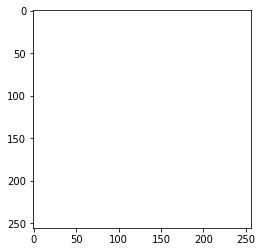

In [ ]:
#pred.shape
plt.imshow((pred[0]),cmap='jet')